# show results with visulization

In [1]:
%matplotlib inline
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
root = os.getcwd()
bubble_num = 1

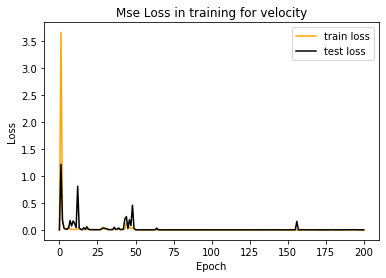

In [2]:
#plot trainloss for velocity
loss = scipy.io.loadmat(os.path.join(root,'results','SimulateResults','TrainLoss_velocity_'+str(bubble_num)+'.mat'))
loss_train = np.float32(loss['loss_train']).flatten()
loss_test = np.float32(loss['loss_test']).flatten()
plt.figure(0)
plt.plot(loss_train,color='orange',label='train loss')
plt.plot(loss_test,color='black',label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Mse Loss in training for velocity')
plt.legend()
plt.show()

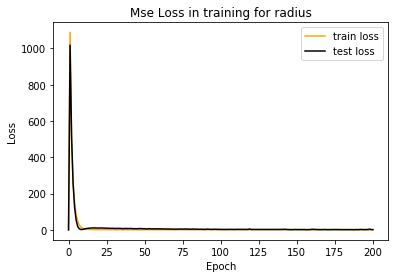

In [3]:
#plot trainloss for radius
loss = scipy.io.loadmat(os.path.join(root,'results','SimulateResults','TrainLoss_radius_'+str(bubble_num)+'.mat'))
loss_train = np.float32(loss['loss_train']).flatten()
loss_test = np.float32(loss['loss_test']).flatten()
plt.figure(0)
plt.plot(loss_train,color='orange',label='train loss')
plt.plot(loss_test,color='black',label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Mse Loss in training for radius')
plt.legend()
plt.show()

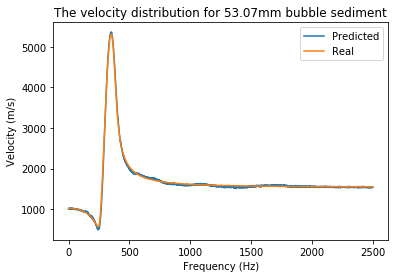

In [8]:
#plot prediction of velocity
velocity = scipy.io.loadmat(os.path.join(root,'results','SimulateResults','TestResults_velocity_'+str(bubble_num)+'.mat'))
data = np.float32(velocity['Prediction'])
real = np.float32(velocity['GT'])
radius = np.float32(velocity['Radius'])
index = 3
label1 = data[index,:].reshape(2500).flatten()
label1 = re_normalization(label1,552.965576171875,5602.8720703125)
label_real = real[index,:].reshape(2500).flatten()
label_real = re_normalization(label_real,552.965576171875,5602.8720703125)
label_radius = radius[index,:].reshape(-1)
n = len(label_real)
x = np.arange(0,n)
plt.figure()
plt.plot(x,label1,label='Predicted')
plt.plot(x,label_real,label='Real')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity (m/s)')
plt.title('The velocity distribution for {0:.2f}mm bubble sediment'.format(label_radius[0]))
plt.legend()
plt.show()

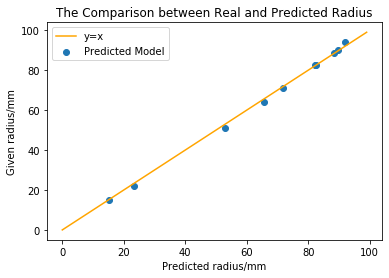

In [6]:
#plot prediction of radius
radius = scipy.io.loadmat(os.path.join(root,'results','SimulateResults','TestResults_radius_'+str(bubble_num)+'.mat'))
data = np.float32(radius['Prediction'])
real = np.float32(radius['GT'])
label1 = data.flatten()
label_real = real.flatten()
x = np.arange(0,100)
plt.figure()
plt.scatter(label_real,label1,label='Predicted Model')
plt.plot(x,x,color='orange',label='y=x')
plt.xlabel('Predicted radius/mm')
plt.ylabel('Given radius/mm')
plt.title('The Comparison between Real and Predicted Radius')
plt.legend()
plt.show()

In [7]:
def re_normalization(value,min_v,max_v):
    return (value*(max_v-min_v))+min_v